In [1]:
import sys
sys.path.append("..")
import cv2
from Second_Modification_YCbCr.forward import image_gen_emb_w as method2
import numpy as np

In [23]:
image = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\Lenna.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)
new_image = image.copy()
new_image[:,:,0] = np.array((1000/114)*gray - (578/114)*image[:,:,1] - (299/114)*image[:,:,2],dtype=np.uint8)
print(cv2.PSNR(new_image,image))

(512, 512)
33.98919024516103


In [40]:
bits_image = np.unpackbits(image)
array_bits = bits_image.reshape((512,512,3,8))
array_bits[:,:,:,6] = 0
array_bits[:,:,:,7] = 1
print(array_bits.shape)
pack_image = np.packbits(array_bits).reshape((512,512,3))
print(pack_image.shape)
print(cv2.PSNR(image,pack_image))

(512, 512, 3, 8)
(512, 512, 3)
46.345103995189085


uint8


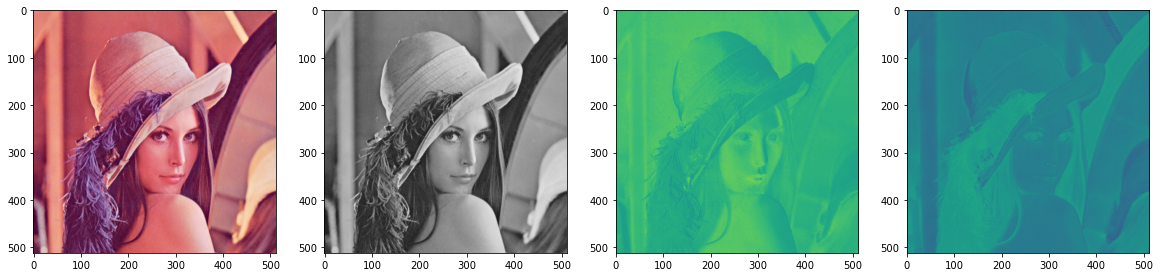

In [22]:
image = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\Lenna.png")
YCrCb_img = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)
print(YCrCb_img.dtype)
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 4,figsize = (20,10))
axes[0].imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(YCrCb_img[:,:,0],cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(YCrCb_img[:,:,1],vmax=255,vmin=0)
axes[3].imshow(YCrCb_img[:,:,2],vmax=255,vmin=0)

In [3]:
w_image = method2(image,13,13,13)
print(cv2.PSNR(image,w_image))


41.92531907482891
41.92531907482891


uint8


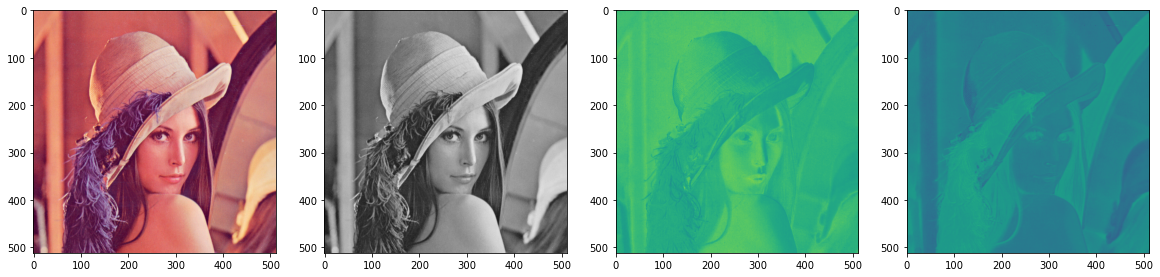

In [4]:
YCrCb_img = cv2.cvtColor(w_image,cv2.COLOR_BGR2YCrCb)
print(YCrCb_img.dtype)
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 4,figsize = (20,10))
axes[0].imshow(cv2.cvtColor(w_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(YCrCb_img[:,:,0],cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(YCrCb_img[:,:,1],vmax=255,vmin=0)
axes[3].imshow(YCrCb_img[:,:,2],vmax=255,vmin=0)

In [5]:
print(cv2.PSNR(image,w_image))


41.92531907482891


In [18]:
YCrCb_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
image_inv = cv2.cvtColor(YCrCb_img,cv2.COLOR_HSV2BGR)
print(cv2.PSNR(image,image_inv))

50.698760550411436


In [16]:
np.packbits([1,0,0,0,0,0,0,0])

array([128], dtype=uint8)